In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd 
import os

In [2]:
# Pandas
import pandas as pd

# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils import class_weight

# Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical


# Audio
import librosa
import librosa.display

# Plot
import matplotlib.pyplot as plt

# Utility
import glob
import numpy as np
from tqdm import tqdm
import IPython.display as ipd
from timeit import default_timer as timer

In [3]:
ls

AnnotatedAudioFiles/
AnnotatedAudioFiles_tmp/
KNN_binary.ipynb
KNN_event_classification.ipynb
KNN_predict.ipynb
KNN_situation_classification.ipynb
Untitled-Copy1.ipynb
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
Untitled3.ipynb
binary_classification.ipynb
convert_mp3_to_wav.ipynb
convert_wav/
convert_wav.ipynb
convert_wav_final.ipynb
crop_event.ipynb
crop_wav.ipynb
cut_file.wav
data/
data_preprocessing.ipynb
dataframe_add_file_name.ipynb
event_data_preprocesssing.csv
event_data_preprocesssing_final.csv
event_data_preprocesssing_jjin_real_final.csv
event_data_preprocesssing_real_final.csv
ffmpeg-4.4.1-amd64-static/
knn_binary_model.pkl
knn_model.pkl
model_classification1.ipynb
model_classification2.ipynb
raw_data.ipynb
same_crop_wav.ipynb
same_preprocessing.ipynb
same_sound_extract/
sound_extract/
star_pydub.ipynb
test.ipynb


In [4]:
# upload the data
df = pd.read_csv('event_data_preprocesssing_real_final.csv')
df

,Unnamed: 0,waveFile,code,situation,no,event,eventCount,from,to,file_name
0,0,code0_dating-violence_01.TextGrid,code0,dating-violence,1.0,footstep,1.0,5.79780,9.44507,code0_dating-violence_01.wav
1,1,code0_dating-violence_01.TextGrid,code0,dating-violence,1.0,door,1.0,9.51020,10.35688,code0_dating-violence_01.wav
2,2,code0_dating-violence_01.TextGrid,code0,dating-violence,1.0,slang,1.0,17.71654,25.92289,code0_dating-violence_01.wav
3,3,code0_dating-violence_01.TextGrid,code0,dating-violence,2.0,groan,1.0,26.37880,34.97592,code0_dating-violence_01.wav
4,4,code0_dating-violence_01.TextGrid,code0,dating-violence,1.0,groan,1.0,37.06007,37.19033,code0_dating-violence_01.wav
...,...,...,...,...,...,...,...,...,...,...
15853,16852,normal_2(time8100to8400).TextGrid,code5,normal,7.0,male_speech,1.0,109.47259,110.95121,code5_normal_2(time8100to8400).wav
15854,16853,normal_2(time8100to8400).TextGrid,code5,normal,8.0,footstep,1.0,111.89214,112.29540,code5_normal_2(time8100to8400).wav
15855,16854,normal_2(time8100to8400).TextGrid,code5,normal,3.0,footstep,1.0,113.33131,118.34427,code5_normal_2(time8100to8400).wav
15856,16855,normal_2(time8100to8400).TextGrid,code5,normal,4.0,footstep,1.0,119.01636,123.04894,code5_normal_2(time8100to8400).wav


In [5]:
df['event'].value_counts()

male_speech    3506
footstep       2281
door           2123
dropping       1644
boom           1479
sob            1384
groan          1106
yelling         745
water           359
appeal          310
scream          218
slang           187
cutter          162
camera           95
slapping         93
looting          56
glass_break      52
hush             44
fight            14
Name: event, dtype: int64

In [6]:
class_id = [i for i in range(0,19)]
class_name = list(df['event'].unique())
class_code = {v:k for k,v in zip(class_id, class_name)}
print(class_code)

{'footstep': 0, 'door': 1, 'slang': 2, 'groan': 3, 'male_speech': 4, 'yelling': 5, 'boom': 6, 'sob': 7, 'cutter': 8, 'slapping': 9, 'appeal': 10, 'looting': 11, 'dropping': 12, 'water': 13, 'scream': 14, 'glass_break': 15, 'fight': 16, 'hush': 17, 'camera': 18}


In [7]:
# Building our dataset
dataset = list()
for folder in glob.glob('same_sound_extract/trim/'):
    list_sounds_path = glob.glob(folder+"//**")
    for elm in list_sounds_path:
        elm1 = elm.split('/')[2]
        idx = elm1.find('_')
        code_name = elm1[idx+1:].replace(".wav","")
        code_num = class_code[code_name]
        label = elm.split(".wav")[0][-5]
        if label == '-':
            label = elm.split(".wav")[0][-6]
        dataset.append({"file_name" : elm,
                       "label" : code_num})
        pass
    pass
pass
dataset = pd.DataFrame(dataset)
dataset = shuffle(dataset, random_state = 42)

In [10]:
dataset.head(10)

,file_name,label
4301,same_sound_extract/trim/61_groan.wav,3
3338,same_sound_extract/trim/15514_sob.wav,7
1941,same_sound_extract/trim/2744_door.wav,1
2894,same_sound_extract/trim/15580_sob.wav,7
4004,same_sound_extract/trim/15558_sob.wav,7
287,same_sound_extract/trim/14440_male_speech.wav,4
1432,same_sound_extract/trim/12304_footstep.wav,0
1615,same_sound_extract/trim/7359_footstep.wav,0
4267,same_sound_extract/trim/15474_sob.wav,7
2338,same_sound_extract/trim/6427_male_speech.wav,4


In [11]:
train, test = train_test_split(dataset, test_size = 0.2, random_state = 42)

In [12]:
print(train.shape)
print(test.shape)

(3537, 2)
(885, 2)


In [13]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
    return mfccs

In [14]:
x_train = list()
y_train = list()
for i in tqdm(range(len(train))):
    x_train.append(extract_feature(train.file_name.iloc[i]))
    y_train.append(train.label.iloc[i])
    pass
pass

100%|██████████| 3537/3537 [00:34<00:00, 103.50it/s]


In [15]:
x_test = list()
y_test = list()
for i in tqdm(range(len(test))):
    x_test.append(extract_feature(test.file_name.iloc[i]))
    y_test.append(test.label.iloc[i])
    pass
pass

100%|██████████| 885/885 [00:08<00:00, 105.73it/s]


In [16]:
print("x_train",len(x_train),"y_train", len(y_train))

x_train 3537 y_train 3537


In [17]:
X_train, Y_train = list(), list()
train_x = list()
train_y = list()
for x,y in zip(x_train,y_train):
    train_x.append(x.shape)
    train_y.append(y.shape)
    X_train.append(x)
    Y_train.append(y)

In [18]:
X_test, Y_test = list(), list()
test_x = list()
test_y = list()
for x,y in zip(x_test,y_test):
    test_x.append(x.shape)
    test_y.append(y.shape)
    X_test.append(x)
    Y_test.append(y)

In [19]:
print(train_x.sort(reverse=True))
train_x

None


[(40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40

In [20]:
# 오디오 재생시간이 다르기 때문에 프레임 수가 각각 다름
print(test_x.sort(reverse=True))
test_x

None


[(40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40, 130),
 (40

In [21]:
max_shape = (40,3957)  

for idx, arr in enumerate(X_train):
    X_train[idx] = arr[:, :max_shape[1]]

batch_arr_train = np.array(X_train)

In [22]:
max_shape = (40,3957)  

for idx, arr in enumerate(X_test):
    X_test[idx] = arr[:, :max_shape[1]]

batch_arr_test = np.array(X_test)

In [23]:
print(batch_arr_train.shape)
print(batch_arr_test.shape)

(3537, 40, 130)
(885, 40, 130)


In [24]:
X_train = np.array(batch_arr_train)
Y_train = np.array(Y_train)

X_test = np.array(batch_arr_test)
Y_test = np.array(Y_test)

In [25]:
print(X_train.shape)
print(X_test.shape)

(3537, 40, 130)
(885, 40, 130)


In [26]:
%%time
encoder = LabelEncoder()
encoder.fit(Y_train)

Y_train = encoder.transform(Y_train)
Y_test = encoder.transform(Y_test)

CPU times: user 216 µs, sys: 803 µs, total: 1.02 ms
Wall time: 684 µs


In [27]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
Y_train1 = to_categorical(Y_train)
Y_test1 = to_categorical(Y_test)

In [28]:
X_test.shape

(885, 40, 130, 1)

In [38]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(40, 130, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())

model.add(Dense(17, activation='softmax'))

In [39]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [40]:
history = model.fit(X_train, Y_train1,
              batch_size=128,
              epochs=300,
              validation_data=(X_test, Y_test1),
              shuffle=True)

Epoch 1/300
28/28 [==============================] - 3s 92ms/step - loss: 4.5384 - accuracy: 0.2310 - val_loss: 2.1512 - val_accuracy: 0.3684
Epoch 2/300
28/28 [==============================] - 2s 83ms/step - loss: 2.0045 - accuracy: 0.3390 - val_loss: 2.0967 - val_accuracy: 0.4316
Epoch 3/300
28/28 [==============================] - 2s 83ms/step - loss: 1.8652 - accuracy: 0.3723 - val_loss: 1.9393 - val_accuracy: 0.4294
Epoch 4/300
28/28 [==============================] - 2s 84ms/step - loss: 1.7394 - accuracy: 0.4210 - val_loss: 1.7799 - val_accuracy: 0.4701
Epoch 5/300
28/28 [==============================] - 2s 84ms/step - loss: 1.6676 - accuracy: 0.4473 - val_loss: 1.7026 - val_accuracy: 0.5107
Epoch 6/300
28/28 [==============================] - 2s 82ms/step - loss: 1.5635 - accuracy: 0.4690 - val_loss: 1.6204 - val_accuracy: 0.5390
Epoch 7/300
28/28 [==============================] - 2s 84ms/step - loss: 1.5189 - accuracy: 0.4883 - val_loss: 1.5752 - val_accuracy: 0.5458
Epoch 

Text(0.5, 1.0, 'Accuracy Curves')

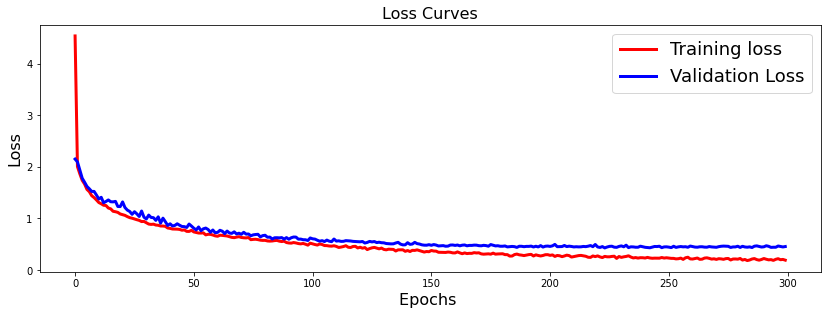

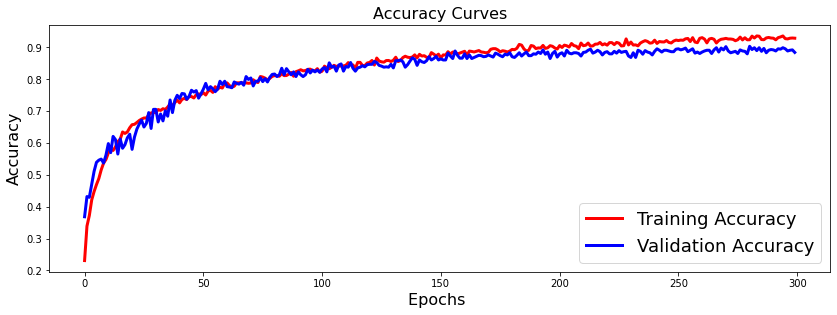

In [41]:
plt.figure(figsize=[14,10])
plt.subplot(211)
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[14,10])
plt.subplot(212)
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)